In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
!nvidia-smi

Tue May 28 22:20:01 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:03:00.0 Off |                    0 |
| N/A   41C    P0    52W / 400W |      3MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# import

In [5]:
from tqdm import tqdm

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
from PIL import Image,ImageOps
import cv2
from os import listdir
import os

# Explor

In [41]:
directory = 'dataset/training_data/images/train'
file_train_list = []

for filename in os.listdir(directory):

    if os.path.isfile(os.path.join(directory, filename)):

        with open(os.path.join(directory, filename), 'r') as file:

            file_train_list.append(filename)

print(file_train_list[:5])

['136759.jpg', '97719.jpg', '97310.jpg', '94.jpg', '149559.jpg']


In [42]:
len(file_train_list)

14448

In [24]:
directory = 'dataset/training_data/images/val'
file_val_list = []

for filename in os.listdir(directory):

    if os.path.isfile(os.path.join(directory, filename)):

        with open(os.path.join(directory, filename), 'r') as file:

            file_val_list.append(filename)

print(file_val_list[:5])

['102062.jpg', '125950.jpg', '48502.jpg', '1698.jpg', '17890.jpg']


In [7]:
directory = 'dataset/training_data/labels/train'
file_label_list = []

for filename in os.listdir(directory):

    if os.path.isfile(os.path.join(directory, filename)):

        with open(os.path.join(directory, filename), 'r') as file:

            file_label_list.append(filename)

print(file_label_list[:5])

['70912.txt', '67850.txt', '146256.txt', '99429.txt', '125173.txt']


In [ ]:
len(file_label_list)

7222

# def

In [5]:
def read_label(idx):
    # idx = 115211

    try:
      yolo_annotations = []
      yolo_annotations_file = f"dataset/training_data/labels/train/{idx}.txt"
      with open(yolo_annotations_file, "r") as f:
          yolo_annotations = f.readlines()
    except:
      print("No Label")
      return 

    for annotation_line in yolo_annotations:
        parts = annotation_line.strip().split()
        label, x_center, y_center, box_width, box_height = map(float, parts)

        return label


In [ ]:
import cv2
import matplotlib.pyplot as plt

def detect_img(indices):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

    # Loop through each index and subplot position
    for idx, ax in zip(indices, axes.flatten()):
        try:
            # Load YOLO annotations
            yolo_annotations_file = f"dataset/training_data/labels/train/{idx}.txt"
            with open(yolo_annotations_file, "r") as f:
                yolo_annotations = f.readlines()
        except:
            print(f"No Label for index {idx}")
            continue

        # Load image
        image_path = f'dataset/training_data/images/train/{idx}.jpg'
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image for index {idx}")
            continue

        height, width, _ = image.shape

        # Iterate over YOLO annotations
        for annotation_line in yolo_annotations:
            parts = annotation_line.strip().split()
            label, x_center, y_center, box_width, box_height = map(float, parts)

            # Convert YOLO coordinates to pixel coordinates
            x_min = int((x_center - box_width / 2) * width)
            y_min = int((y_center - box_height / 2) * height)
            x_max = int((x_center + box_width / 2) * width)
            y_max = int((y_center + box_height / 2) * height)

            # Draw bounding box on the image
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

        # Convert image from BGR to RGB for Matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display the image with the annotation using Matplotlib
        ax.imshow(image_rgb)
        ax.set_title(f"Class: {label}")
        ax.axis('off')  # Turn off axis

    plt.tight_layout()
    plt.show()

# Loop visualize

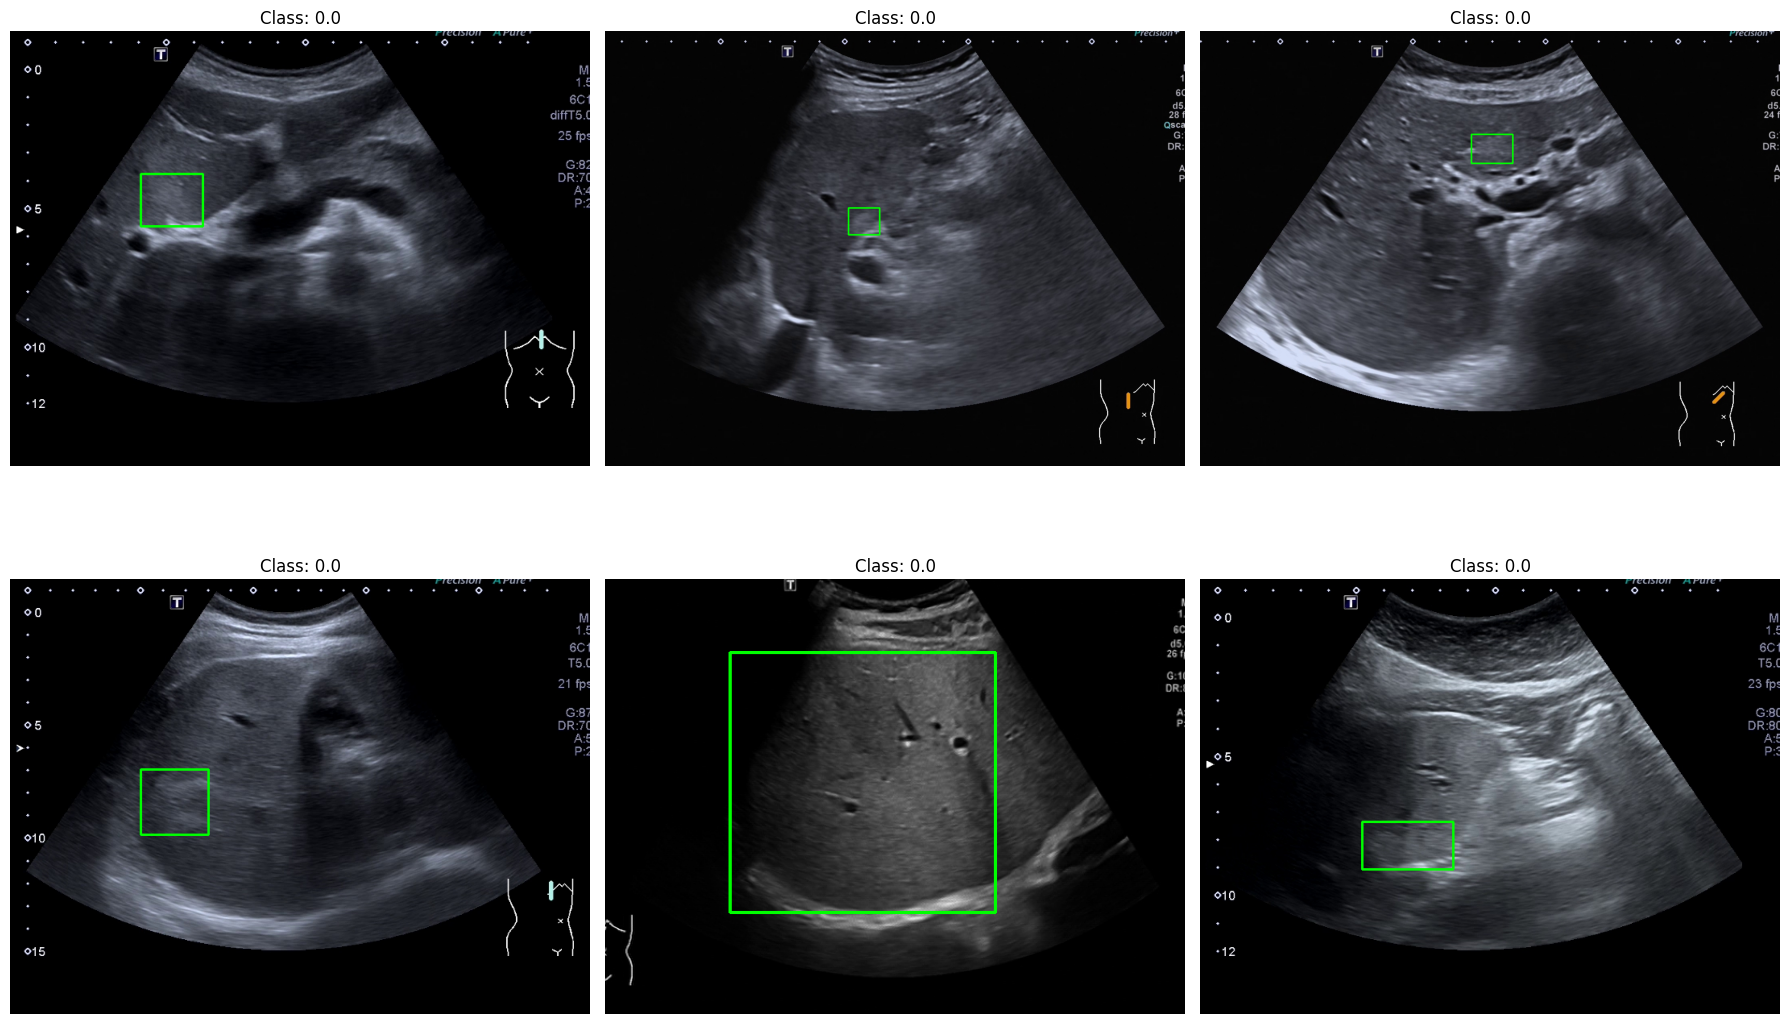

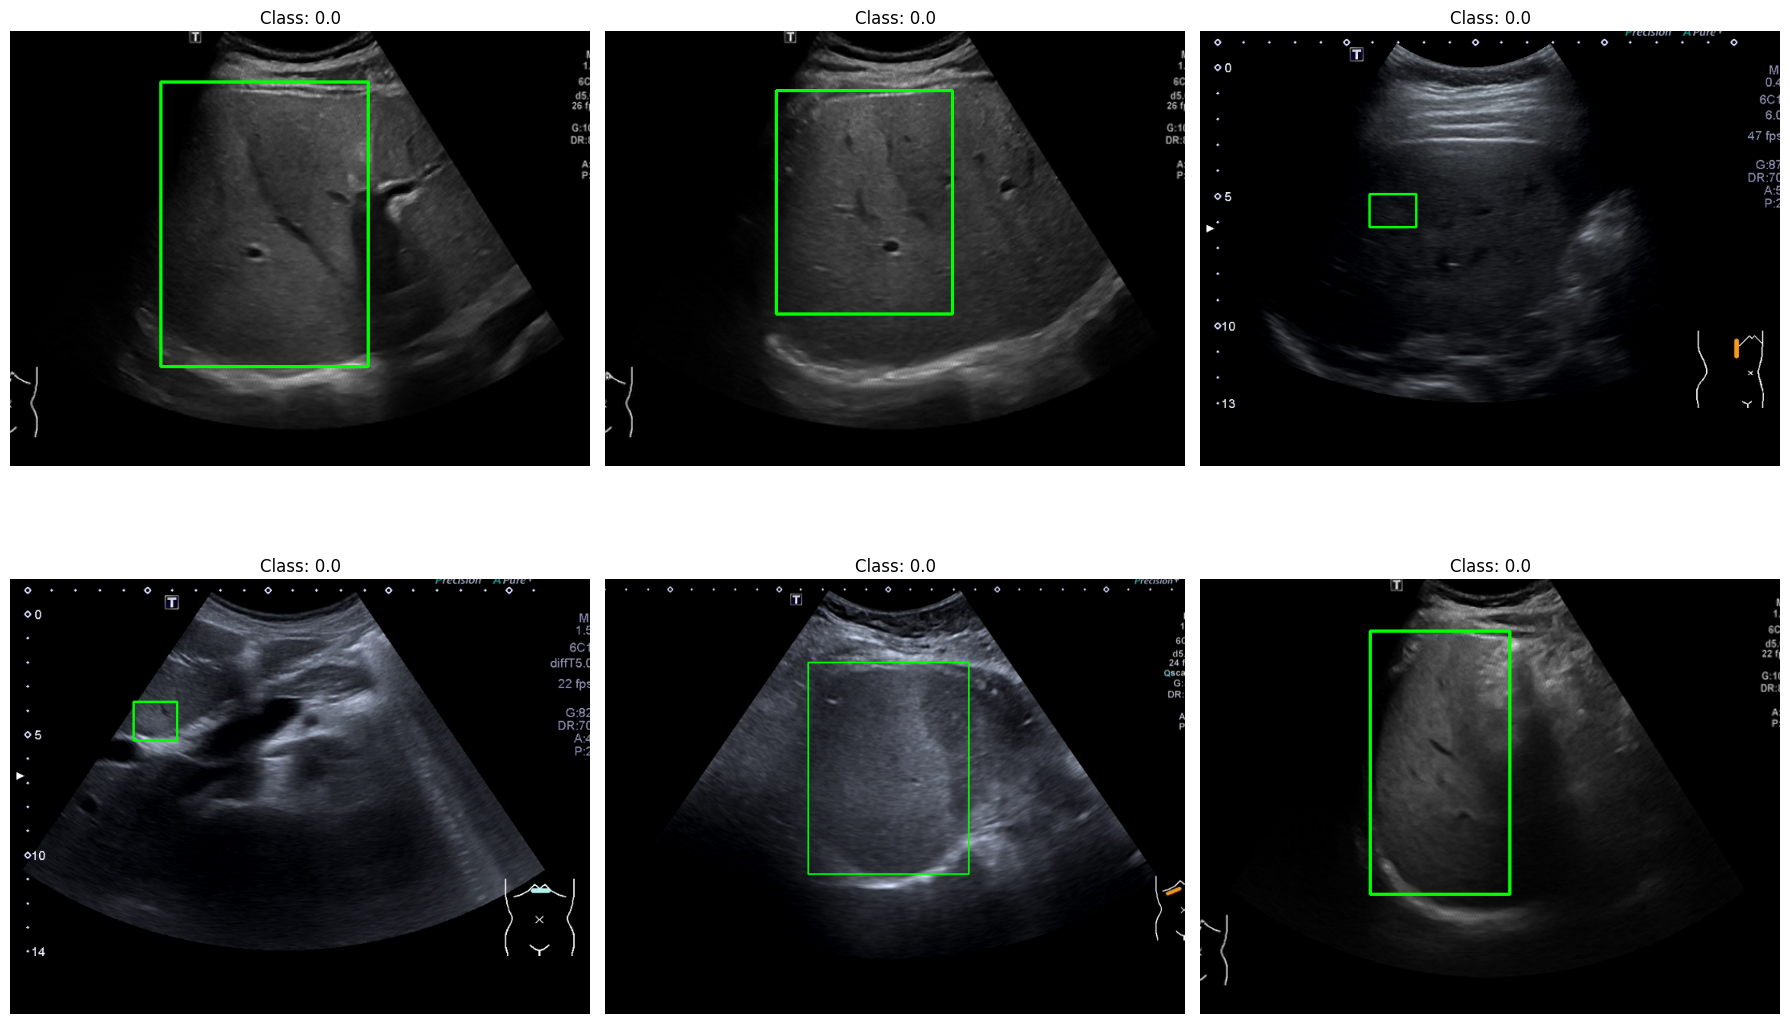

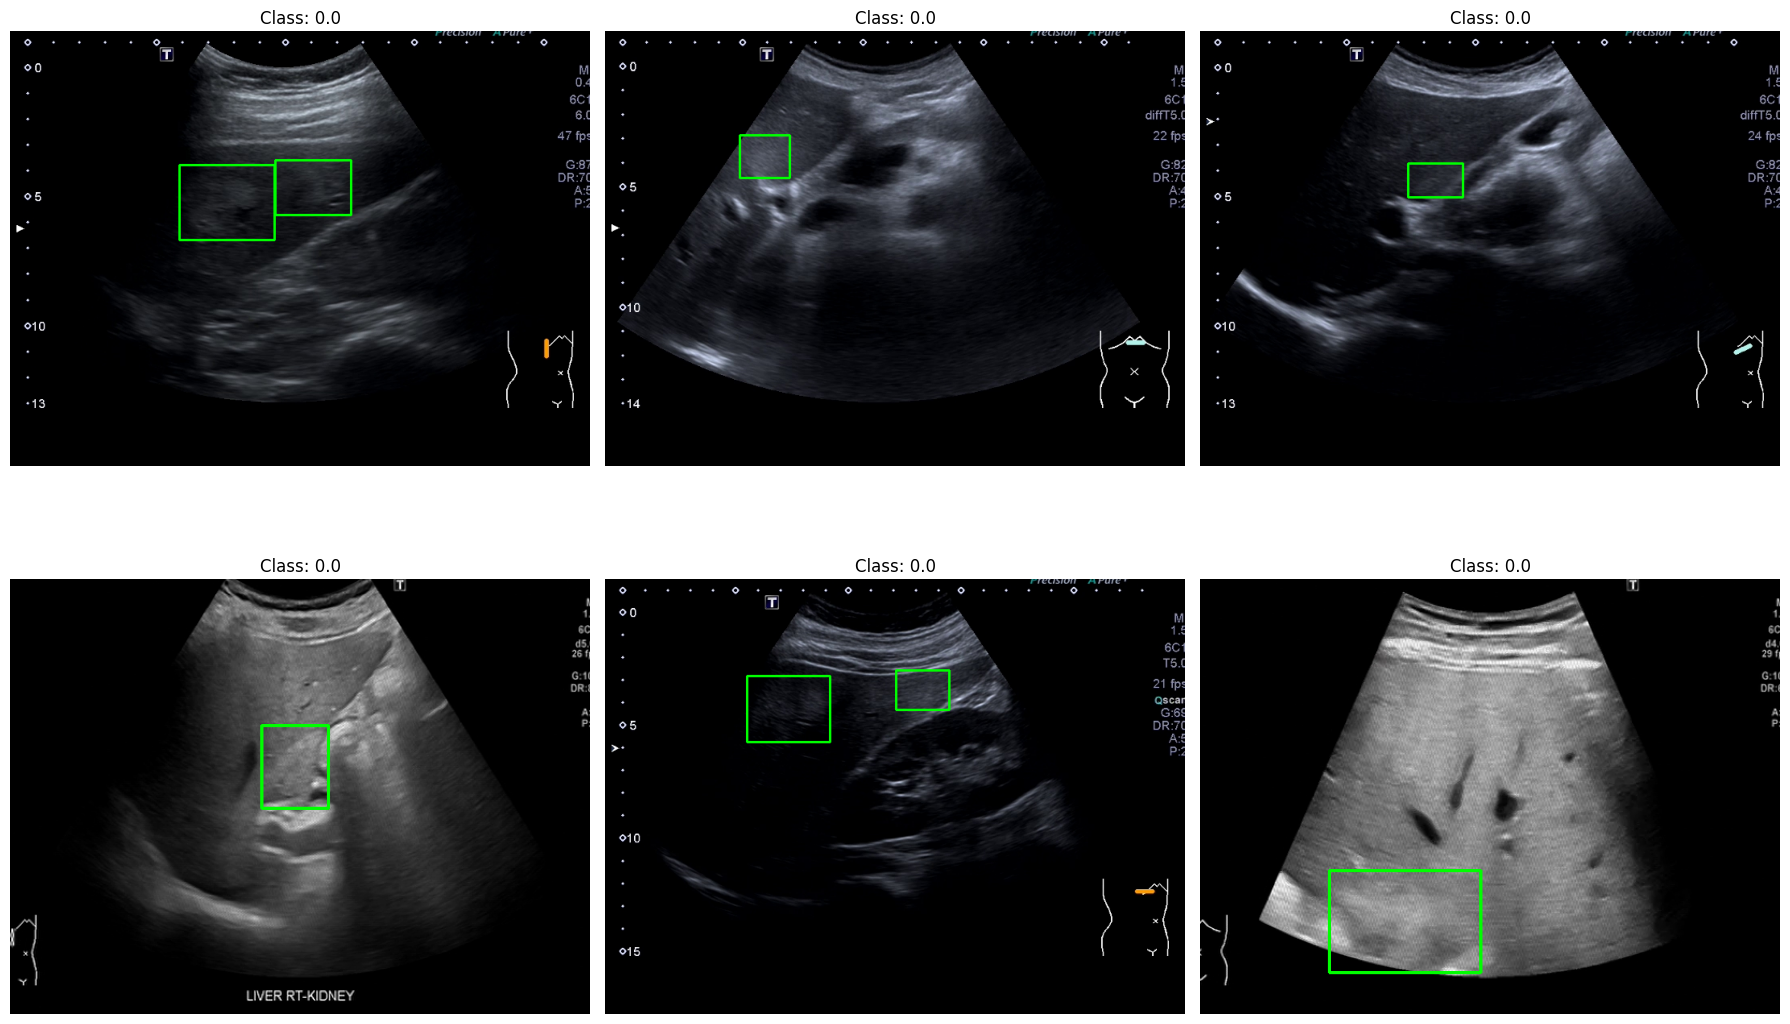

In [11]:
indices = []
num = 0
for file_name in file_label_list:
  idx = file_name.split(".")
  class_id = read_label(idx[0])
  if class_id == 0:
    indices.append(idx[0])
    if len(indices) == 6:
      detect_img(indices)
      indices = []
      num += 1
      if num == 3: break

In [12]:
label_all = []
file_names_to_keep = []
for file_name in file_label_list:
  idx = file_name.split(".")
  class_id = read_label(idx[0])
  label_all.append(class_id)
  file_names_to_keep.append(idx[0])

In [ ]:
from tqdm import tqdm

In [15]:
directory = "dataset/training_data/labels/train"
files = os.listdir(directory)
print("ano : ",len(files))
directory = "dataset/training_data/images/train"
files = os.listdir(directory)
print("image : ",len(files))

ano :  7222
image :  14448


In [16]:
directory = "dataset/training_data/labels/train"

for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    filename = filename.split(".")
    if filename[0] not in file_names_to_keep:
        # Remove the file
        os.remove(filepath)
        print(f"File '{filename}' removed.")

In [ ]:
directory = "dataset/training_data/images/train"

for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    filename = filename.split(".")
    if filename[0] not in file_names_to_keep:
        # Remove the file
        os.remove(filepath)
        print(f"File '{filename}' removed.")

In [19]:
directory = "dataset/training_data/labels/train"
files = os.listdir(directory)
print("ano : ",len(files))
directory = "dataset/training_data/images/train"
files = os.listdir(directory)
print("image : ",len(files))

ano :  7222
image :  7222


# Enhance Image

In [11]:
from PIL import Image, ImageEnhance, ImageFilter

In [12]:
def enhance_image(image, factor=1, blur_radius=0.8):
    img = image.filter(ImageFilter.UnsharpMask(radius=2, percent=150))
    enhancer_color = ImageEnhance.Color(img)
    img = enhancer_color.enhance(factor)

    # Enhance brightness
    enhancer_brightness = ImageEnhance.Brightness(img)
    img = enhancer_brightness.enhance(1.5)
    
    # Enhance contrast
    enhancer_contrast = ImageEnhance.Contrast(img)
    img = enhancer_contrast.enhance(1)

    # Apply Gaussian blur
    img = img.filter(ImageFilter.GaussianBlur(radius=blur_radius))
    
    return img


In [14]:
directory = "dataset/training_data/images/train"
for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions as needed
        # Read the image
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        
        image_pil = Image.fromarray(image)
        image = enhance_image(image_pil)
        image = np.asarray(image)
        

        # Save the filtered image, replacing the original image
        cv2.imwrite(image_path, image)

100%|██████████| 14448/14448 [36:12<00:00,  6.65it/s] 


# Glare Reduction - Image Processing

In [6]:
import cv2
import numpy
import math
from PIL import Image, ImageEnhance

# =================CONVERT================
def CV2_to_PIL_img(cv2_im):
    """
    Convert Opencv's BGR image to PIL image

    Input:
    --------
        cv2_im: Opencv's BGR

    Output: 
    --------
        PIL Image
    """

    cv2_im = cv2.cvtColor(cv2_im, cv2.COLOR_BGR2RGB)
    pil_im = Image.fromarray(cv2_im)
    return pil_im


def PIL_to_CV2_img(img):
    """
    Convert PIL image to Opencv's BGR image

    Input:
    --------
        img: PIL Image

    Output: 
    --------
        Opencv's BGR Image
    """
    cv_image = numpy.array(img.convert('RGB')) 
    cv_image = cv_image[:, :, ::-1].copy() 
    return cv_image
# ========================================



# =========POLYNOMIAL FUNCTIONS===========
def first_polynomial_function(image):
    """
    Implementation of first polynomial function.

    Input:
    --------
        image: Opencv's BGR Image

    More detail at `Documentation.pdf`
    """

    table = numpy.array([1.657766*i-0.009157128*(i**2) + 0.00002579473*(i**3)
		for i in numpy.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)


def second_polynomial_function(image):
    """
    Implementation of second polynomial function.

    Input:
    --------
        image: Opencv's BGR Image
    
    More detail at `Documentation.pdf`
    """

    table = numpy.array([
		-4.263256 * math.exp(-14)+1.546429*i-0.005558036*(i**2)+0.00001339286*(i**3)
		for i in numpy.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)
# ========================================



# ===========GAMMA CORRECTION ============
def adjust_gamma(image, gamma=1.0):
    """
    Implementation of gamma correction

    Input:
    --------
        image: Opencv's BGR Image
    
    More detail at `Gamma-Correction.pdf`
    """
	
    invGamma = 1.0 / gamma
    table = numpy.array([((i / 255.0) ** invGamma) * 255
		for i in numpy.arange(0, 256)]).astype("uint8")
		    
    return cv2.LUT(image, table)
# ========================================



# =========CONTRAST & BRIGHTNESS==========
def enhance_contrast(image, factor=1.4):
    """
    Enhance contrast base on PIL->ImageEnhance.
    Default suitable factor is 1,4.

    Input:
        image: Opencv's BGR Image
        factor: contrast's factor
    
    Output:
        Enhanced contrast BGR image
    """

    _image = ImageEnhance.Contrast(
        CV2_to_PIL_img(image)
    ).enhance(factor)
    
    return PIL_to_CV2_img(_image)
# ========================================

# =================METHODS================
def reduce_glare(image):
    """
    Mixed 4 filter:
        1. First polynomial function
        2. Gamma correction: g = 0.75
        3. Second polynomial function
        4. Gamma correction: g = 0.8

    Input: BGR Image.\n
    Output: Reduce glare.
    """
    _image = adjust_gamma(
        second_polynomial_function(
            adjust_gamma(
                first_polynomial_function(image), 
                0.75
            )
        ),
        0.8
    )
    return _image


def mix_filter(image):
    """
    Mixed 4 steps:
        1. Reduce glare
        2. Enhance contract: f = 1.6
        3. Reduce glare
        4. Enhance contract: f = 1.4

    Input: BGR Image.\n
    Output: Reduced glare & clearly image.
    """
    _image = enhance_contrast(
        reduce_glare(
            enhance_contrast(
                reduce_glare(image), 
                factor=1.6
            )
        ), 
        factor=1.4
    )
    return _image

# check_mobile 

In [12]:
import pandas as pd

In [14]:
data = pd.read_excel('csv/mapping.xlsx')
data

Image File Annotation File   Source              Type
0       24084.jpg       24084.txt  machine  machine_positive
1       97528.jpg       97528.txt  machine  machine_positive
2       54563.jpg       54563.txt  machine  machine_positive
3      115211.jpg      115211.txt  machine  machine_positive
4       71913.jpg       71913.txt  machine  machine_positive
...           ...             ...      ...               ...
19341    1160.jpg             NaN   mobile   mobile_negative
19342     153.jpg             NaN   mobile   mobile_negative
19343  130705.jpg             NaN   mobile   mobile_negative
19344     812.jpg             NaN   mobile   mobile_negative
19345    1410.jpg             NaN   mobile   mobile_negative

[19346 rows x 4 columns]

In [18]:
moblie_list = data[data['Source'] == 'mobile']['Image File'].tolist()

In [20]:
print(file_train_list[:5])

['136759.jpg', '97719.jpg', '97310.jpg', '94.jpg', '149559.jpg']


In [28]:
train_is_mo = []
for i in file_val_list:
    if i in moblie_list:
        train_is_mo.append(i)
print(len(train_is_mo))

899


In [29]:
train_is_mo[:10]

['1698.jpg',
 '1805.jpg',
 '138037.jpg',
 '44095.jpg',
 '25318.jpg',
 '131388.jpg',
 '4074.jpg',
 '8900.jpg',
 '504.jpg',
 '13899.jpg']

In [30]:
directory = 'dataset/training_data/labels/val'
file_label_val = []

for filename in os.listdir(directory):

    if os.path.isfile(os.path.join(directory, filename)):

        with open(os.path.join(directory, filename), 'r') as file:

            file_label_val.append(filename)

print(file_label_val[:5])

['136278.txt', '116526.txt', '21585.txt', '101279.txt', '20381.txt']


In [37]:
val_u = []
for i in file_label_val:
    s = i.split(".")
    for j in train_is_mo:
        h = j.split(".")
        if s[0] == h[0]:
            val_u.append(s[0] + "." + s[1])
print(len(val_u))

446


In [38]:
val_u[:10]

['109001.txt',
 '1049.txt',
 '430.txt',
 '16474.txt',
 '504.txt',
 '3841.txt',
 '41218.txt',
 '679.txt',
 '146326.txt',
 '132677.txt']

In [43]:
from tqdm import tqdm

In [44]:
import shutil
import os

dir1 = 'dataset/training_data/images/val'
dir2 = 'dataset/training_data/images/train'

for image_name in train_is_mo:
    source_path = os.path.join(dir1, image_name)
    destination_path = os.path.join(dir2, image_name)
    shutil.copy(source_path, destination_path)
    # print(f"Copied {image_name} from dir1 to dir2")

In [46]:
dir1 = 'dataset/training_data/labels/val'
dir2 = 'dataset/training_data/labels/train'

for image_name in tqdm(val_u):
    source_path = os.path.join(dir1, image_name)
    destination_path = os.path.join(dir2, image_name)
    shutil.copy(source_path, destination_path)
    # print(f"Copied {image_name} from dir1 to dir2")

100%|██████████| 446/446 [00:03<00:00, 114.22it/s]


In [45]:
directory = 'dataset/training_data/images/train'
new_train = []

for filename in os.listdir(directory):

    if os.path.isfile(os.path.join(directory, filename)):

        with open(os.path.join(directory, filename), 'r') as file:

            new_train.append(filename)

print(len(new_train))

15347


## Preprocess Loop

In [50]:
len(train_is_mo)

899

In [54]:
directory = "dataset/training_data/images/train"

for filename in tqdm(os.listdir(directory)):
    if filename in train_is_mo:  
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions as needed
            # Read the image
            image_path = os.path.join(directory, filename)
            image = cv2.imread(image_path)
        
            # image_pil = Image.fromarray(image)
            image = mix_filter(image)
            # image = np.asarray(image)
        
            #Save the filtered image, replacing the original image
            cv2.imwrite(image_path, image)

100%|██████████| 15347/15347 [12:03<00:00, 21.22it/s]


# Preprocess Test

In [58]:
directory = "test/test/images"

for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions as needed
        # Read the image
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        
        # image_pil = Image.fromarray(image)
        image = mix_filter(image)
        # image = np.asarray(image)
        
        #Save the filtered image, replacing the original image
        cv2.imwrite(image_path, image)

100%|██████████| 5153/5153 [55:04<00:00,  1.56it/s]  


## Plot Preprocess

In [10]:
def polt_img():
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
    indices = [ "1", "10", "64", "16215", "17631", "20088"]
    for idx, ax in zip(indices, axes.flatten()):
        image = cv2.imread(f"test/test/images/{idx}.jpg")
        # image_rgb = cv2.cvtColor(mix_filter(image), cv2.COLOR_BGR2RGB)

        ax.imshow(image)
        ax.axis('off')  # Turn off axis

    plt.tight_layout()
    plt.show()
    

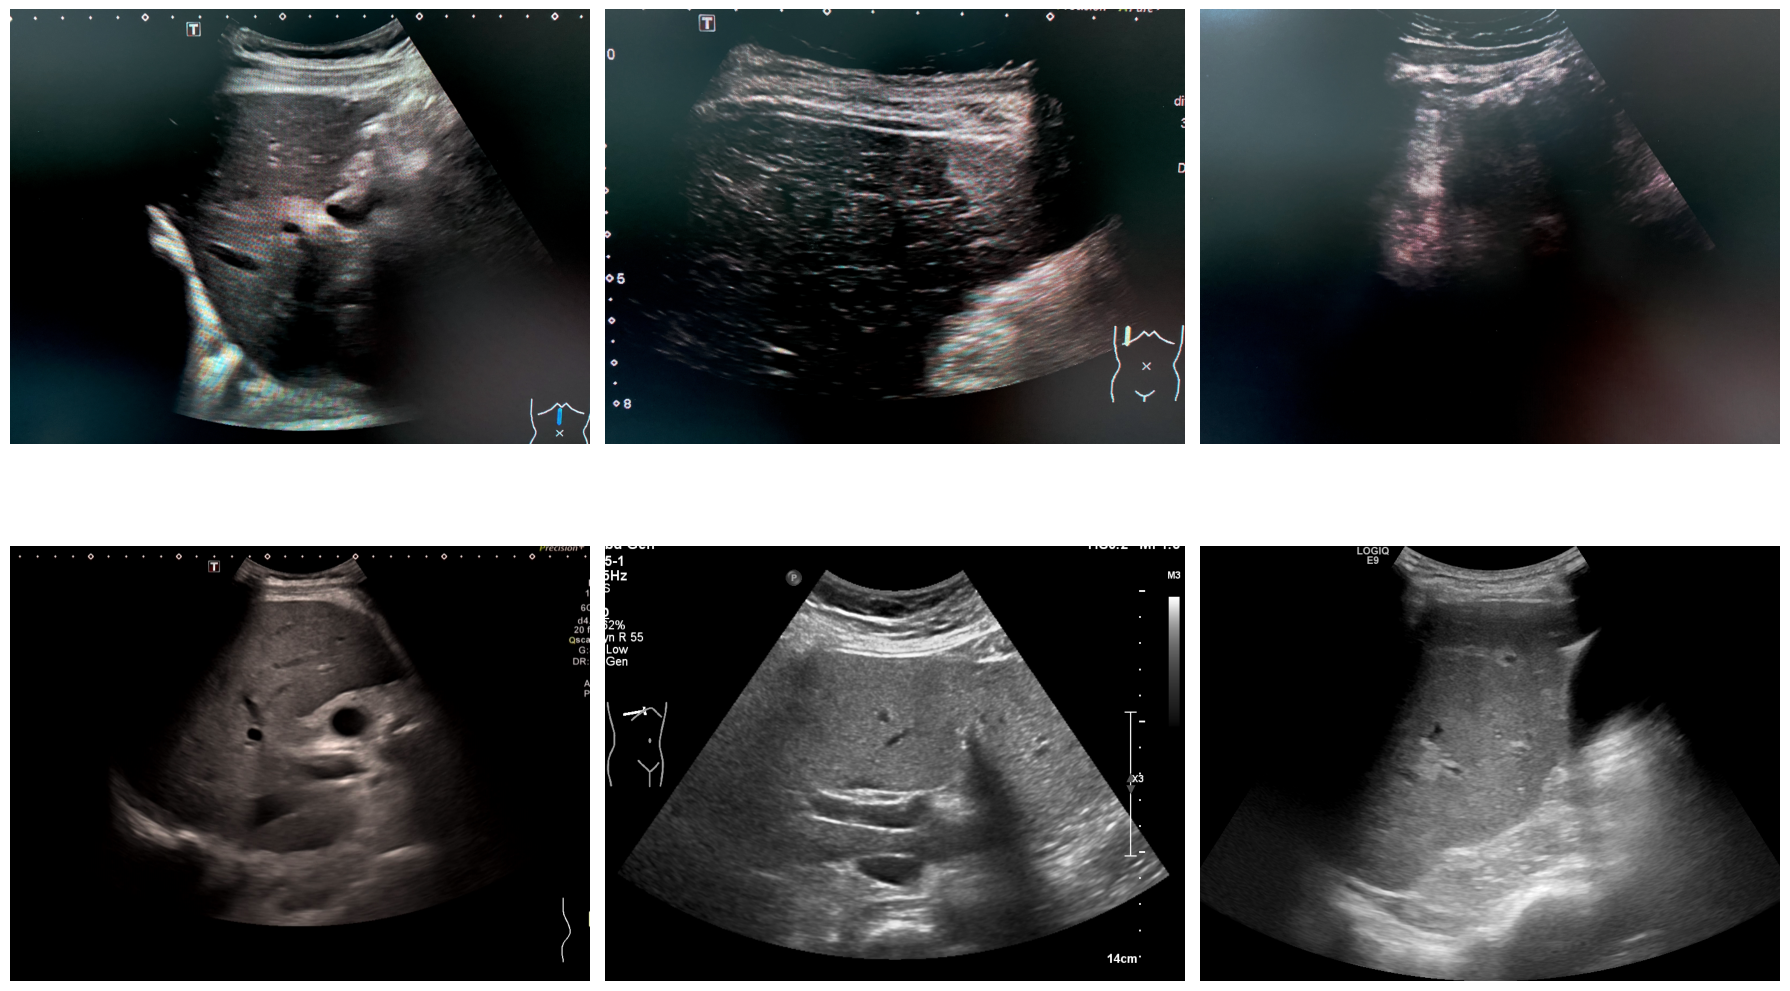

In [11]:
polt_img()

# Replace not moblie

In [6]:
mol = pd.read_csv("csv/test_mapping.csv")
mol

image_path  Image File Annotation File  \
0          ./test/test/images\1.jpg       1.jpg           1.txt   
1         ./test/test/images\10.jpg      10.jpg          10.txt   
2       ./test/test/images\1000.jpg    1000.jpg        1000.txt   
3      ./test/test/images\10001.jpg   10001.jpg       10001.txt   
4     ./test/test/images\100077.jpg  100077.jpg      100077.txt   
...                             ...         ...             ...   
5148     ./test/test/images\998.jpg     998.jpg         998.txt   
5149   ./test/test/images\99805.jpg   99805.jpg       99805.txt   
5150    ./test/test/images\9982.jpg    9982.jpg        9982.txt   
5151     ./test/test/images\999.jpg     999.jpg         999.txt   
5152   ./test/test/images\99965.jpg   99965.jpg       99965.txt   

      avg_brightness   Source  
0          95.097465   mobile  
1          91.772285   mobile  
2         110.968967   mobile  
3          32.096696  machine  
4          14.040617  machine  
...              ...      ...  
5148      103.684948   mobile  
5149       71.827596   mobile  
5150       29.727399  machine  
5151       97.415670   mobile  
5152       92.029188   mobile  

[5153 rows x 5 columns]

In [7]:
mol_list = mol[mol['Source'] == "machine"]['Image File'].tolist()
len(mol_list)

2201

In [8]:
mol_list[:9]

['10001.jpg',
 '100077.jpg',
 '100105.jpg',
 '100206.jpg',
 '100212.jpg',
 '100220.jpg',
 '100227.jpg',
 '100231.jpg',
 '100296.jpg']

In [2]:
import os

In [3]:
directory = 'test/test/images'
test_count = []

for filename in os.listdir(directory):

    if os.path.isfile(os.path.join(directory, filename)):

        with open(os.path.join(directory, filename), 'r') as file:

            test_count.append(filename)

print(len(test_count))

5153


In [9]:
import os
import shutil
from tqdm import tqdm

dir1 = 'test_main/test/images'
dir2 = 'test/test/images'

for image_name in tqdm(mol_list):
    source_path = os.path.join(dir1, image_name)
    destination_path = os.path.join(dir2, image_name)
    
    if os.path.exists(destination_path):
        os.remove(destination_path)  # Remove the existing file
        
    shutil.copy(source_path, destination_path)


100%|██████████| 2201/2201 [00:48<00:00, 45.24it/s]
